### Importing necessary library and loading the dataset

In [112]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Loan_Prediction_Dataset
df = pd.read_csv('Loan_Prediction_Dataset.csv')


df.head()


,Id,Gross_Income,Expenses,Net_Income,Age,Gender,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Yrs,Current_House_Yrs,Nos_Family_Members,Credit_Type,Credit_Score,Co-Applicant_Credit_Type,Risk_Flag
0,1.0,1303834.0,391173.0,912661.0,23.0,M,3.0,single,rented,no,Software_Developer,Hindupur,Andhra_Pradesh,3.0,13.0,1,EXP,758.0,CIB,0
1,2.0,7574516.0,2272395.0,5302121.0,40.0,F,10.0,single,rented,no,Chartered_Accountant,Khandwa,Madhya_Pradesh,9.0,13.0,3,EQUI,552.0,EXP,1
2,3.0,3991815.0,1197611.0,2794204.0,66.0,M,4.0,married,rented,no,Secretary,Bidhannagar,West_Bengal,4.0,10.0,4,EXP,834.0,CIB,0
3,4.0,6256451.0,1876976.0,4379475.0,41.0,F,2.0,married,rented,yes,Technician,Bellary,Karnataka,2.0,12.0,1,EXP,587.0,CIB,1
4,5.0,5768871.0,1730708.0,4038163.0,47.0,M,11.0,single,rented,no,Secretary,Danapur,Bihar,3.0,14.0,2,CRIF,602.0,EXP,1


In [113]:
# Checking for missing values
df.isnull().sum()

Id                          6
Gross_Income                6
Expenses                    6
Net_Income                  3
Age                         5
Gender                      2
Experience                  3
Marital_Status              3
House_Ownership             2
Car_Ownership               2
Profession                  5
City                        0
State                       1
Current_Job_Yrs             4
Current_House_Yrs           5
Nos_Family_Members          0
Credit_Type                 2
Credit_Score                3
Co-Applicant_Credit_Type    1
Risk_Flag                   0
dtype: int64

In [114]:
# statistical info on numeric features 
df.describe()

# datatype info on all features
df.info()

# sns.heatmap(df.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55778 entries, 0 to 55777
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        55772 non-null  float64
 1   Gross_Income              55772 non-null  float64
 2   Expenses                  55772 non-null  float64
 3   Net_Income                55775 non-null  float64
 4   Age                       55773 non-null  float64
 5   Gender                    55776 non-null  object 
 6   Experience                55775 non-null  float64
 7   Marital_Status            55775 non-null  object 
 8   House_Ownership           55776 non-null  object 
 9   Car_Ownership             55776 non-null  object 
 10  Profession                55773 non-null  object 
 11  City                      55778 non-null  object 
 12  State                     55777 non-null  object 
 13  Current_Job_Yrs           55774 non-null  float64
 14  Curren

In [115]:
# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Filling missing values with mean for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Filling missing values with mode for categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [116]:
# Checking for missing values
df.isnull().sum()

Id                          0
Gross_Income                0
Expenses                    0
Net_Income                  0
Age                         0
Gender                      0
Experience                  0
Marital_Status              0
House_Ownership             0
Car_Ownership               0
Profession                  0
City                        0
State                       0
Current_Job_Yrs             0
Current_House_Yrs           0
Nos_Family_Members          0
Credit_Type                 0
Credit_Score                0
Co-Applicant_Credit_Type    0
Risk_Flag                   0
dtype: int64

In [117]:
# Checking for duplicate values
df.duplicated().sum()

0

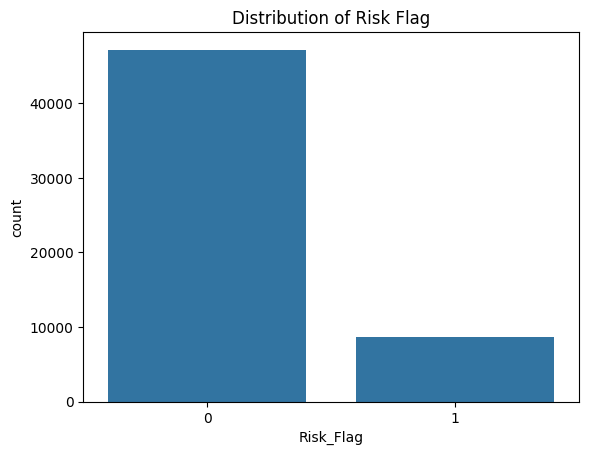

In [118]:
# Visualizing distribution of the target variable ('Risk_Flag')
sns.countplot(x='Risk_Flag', data=df)
plt.title('Distribution of Risk Flag')
plt.show()

### visualizing univariate categorical features

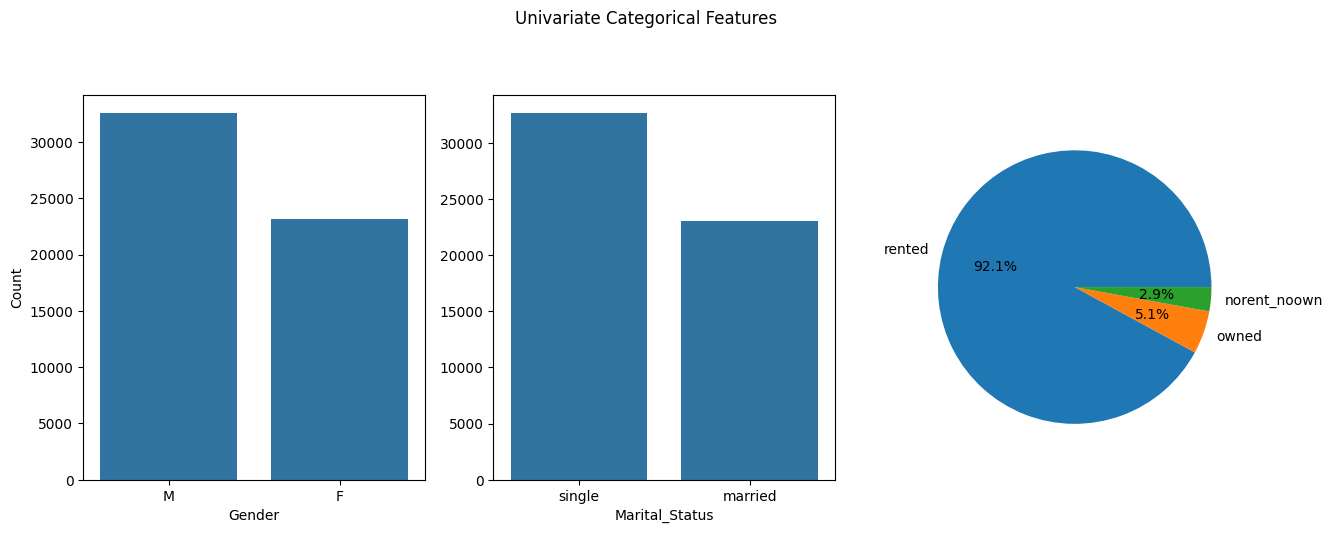

In [119]:
plt.figure(figsize=(15, 5))

# Countplot for 'Gender'
plt.subplot(131)
sns.countplot(data=df, x="Gender")
plt.ylabel('Count')

# Countplot for 'Marital_Status'
plt.subplot(132)
sns.countplot(data=df, x="Marital_Status")
plt.ylabel(' ')

# Pie chart for 'House_Ownership'
plt.subplot(133)
df['House_Ownership'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.ylabel(' ')   

plt.suptitle('Univariate Categorical Features', y=1.05)
plt.show()


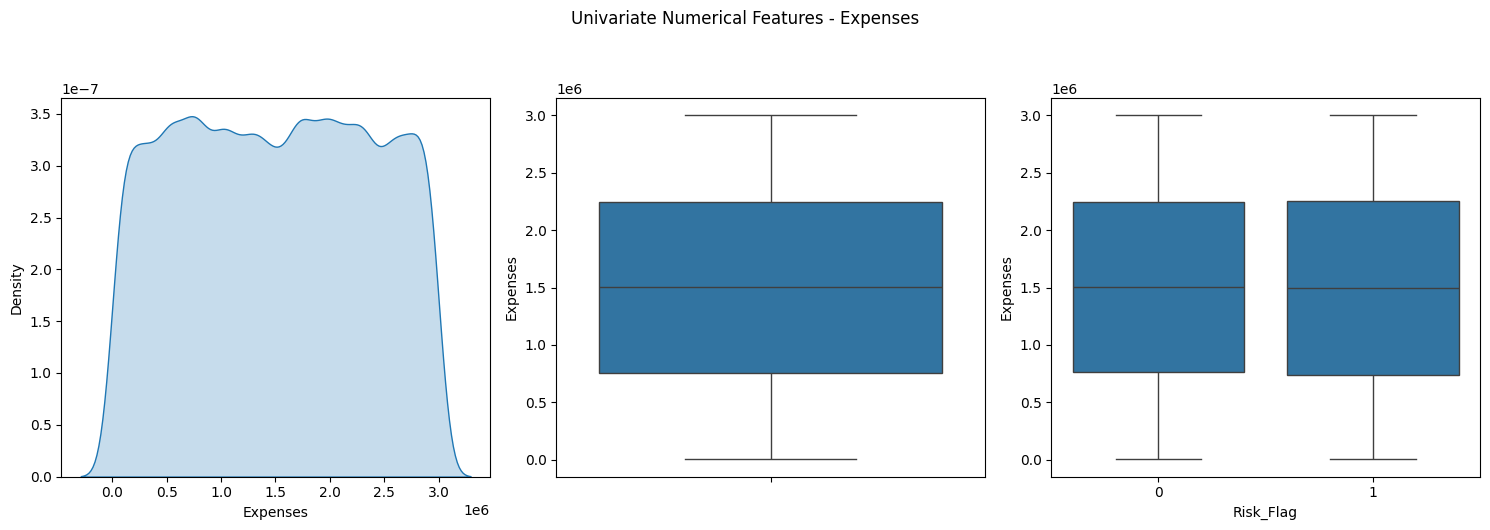

In [120]:
plt.figure(figsize=(15, 5))

# KDE Plot for 'Expenses'
plt.subplot(131)
sns.kdeplot(df['Expenses'], fill=True)
plt.ylabel('Density')

# Boxplot for 'Expenses'
plt.subplot(132)
sns.boxplot(data=df, y='Expenses')
plt.ylabel('Expenses')

# Distribution and Boxplot for 'Expenses' based on 'Risk_Flag'
plt.subplot(133)
sns.boxplot(x='Risk_Flag', y='Expenses', data=df)
plt.xlabel('Risk_Flag')
plt.ylabel('Expenses')

plt.suptitle('Univariate Numerical Features - Expenses', y=1.05)
plt.tight_layout()
plt.show()


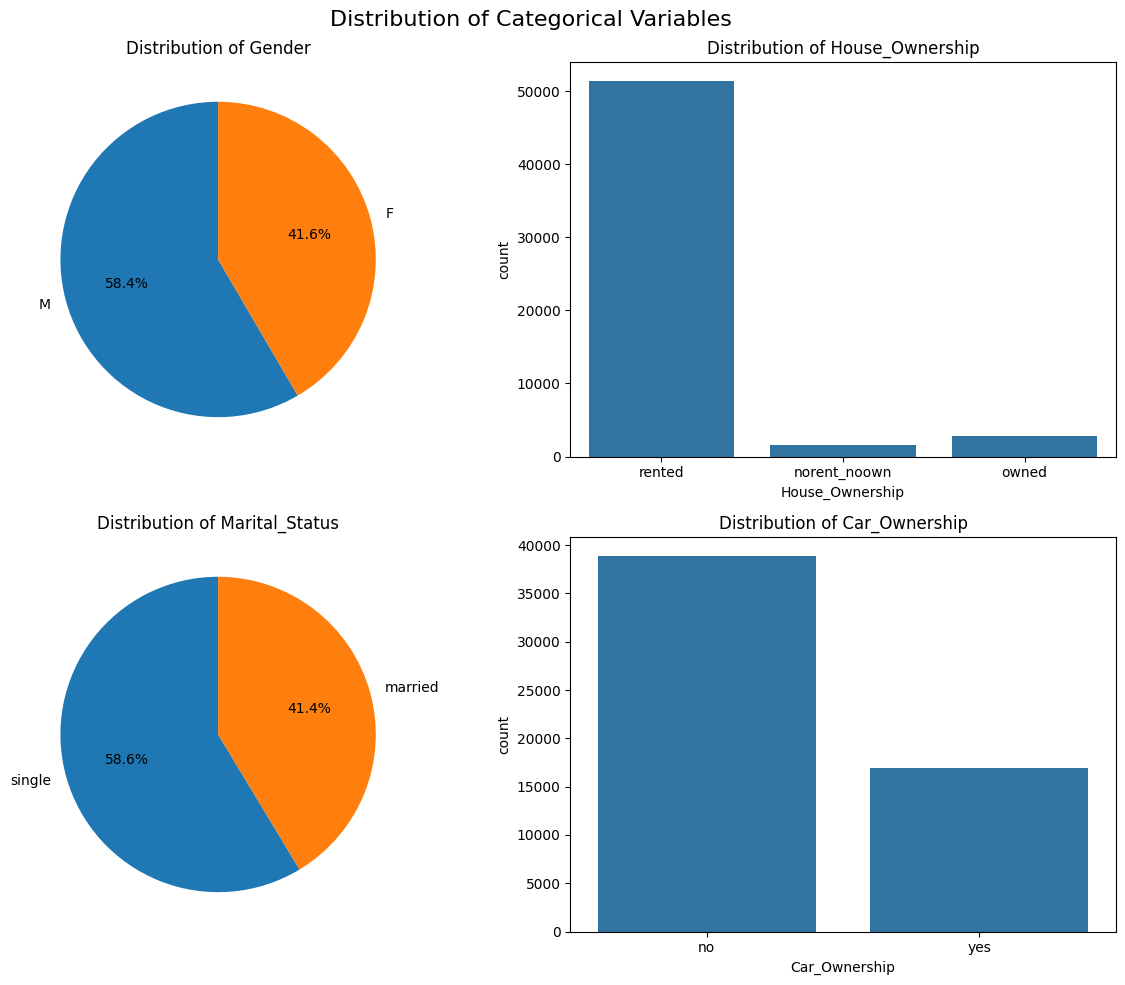

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# categorical columns for visualization
categorical_columns = ['Gender', 'Marital_Status', 'House_Ownership', 'Car_Ownership']

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Plotting pie charts and bar plots for categorical columns
for i, col in enumerate(categorical_columns):
    if i < 2:
        df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 0], startangle=90)
        axes[i, 0].set(title=f'Distribution of {col}')
        axes[i, 0].set_ylabel('')  # Remove default label
    else:
        sns.countplot(x=col, data=df, ax=axes[i-2, 1])
        axes[i-2, 1].set(title=f'Distribution of {col}')

plt.tight_layout()
plt.show()


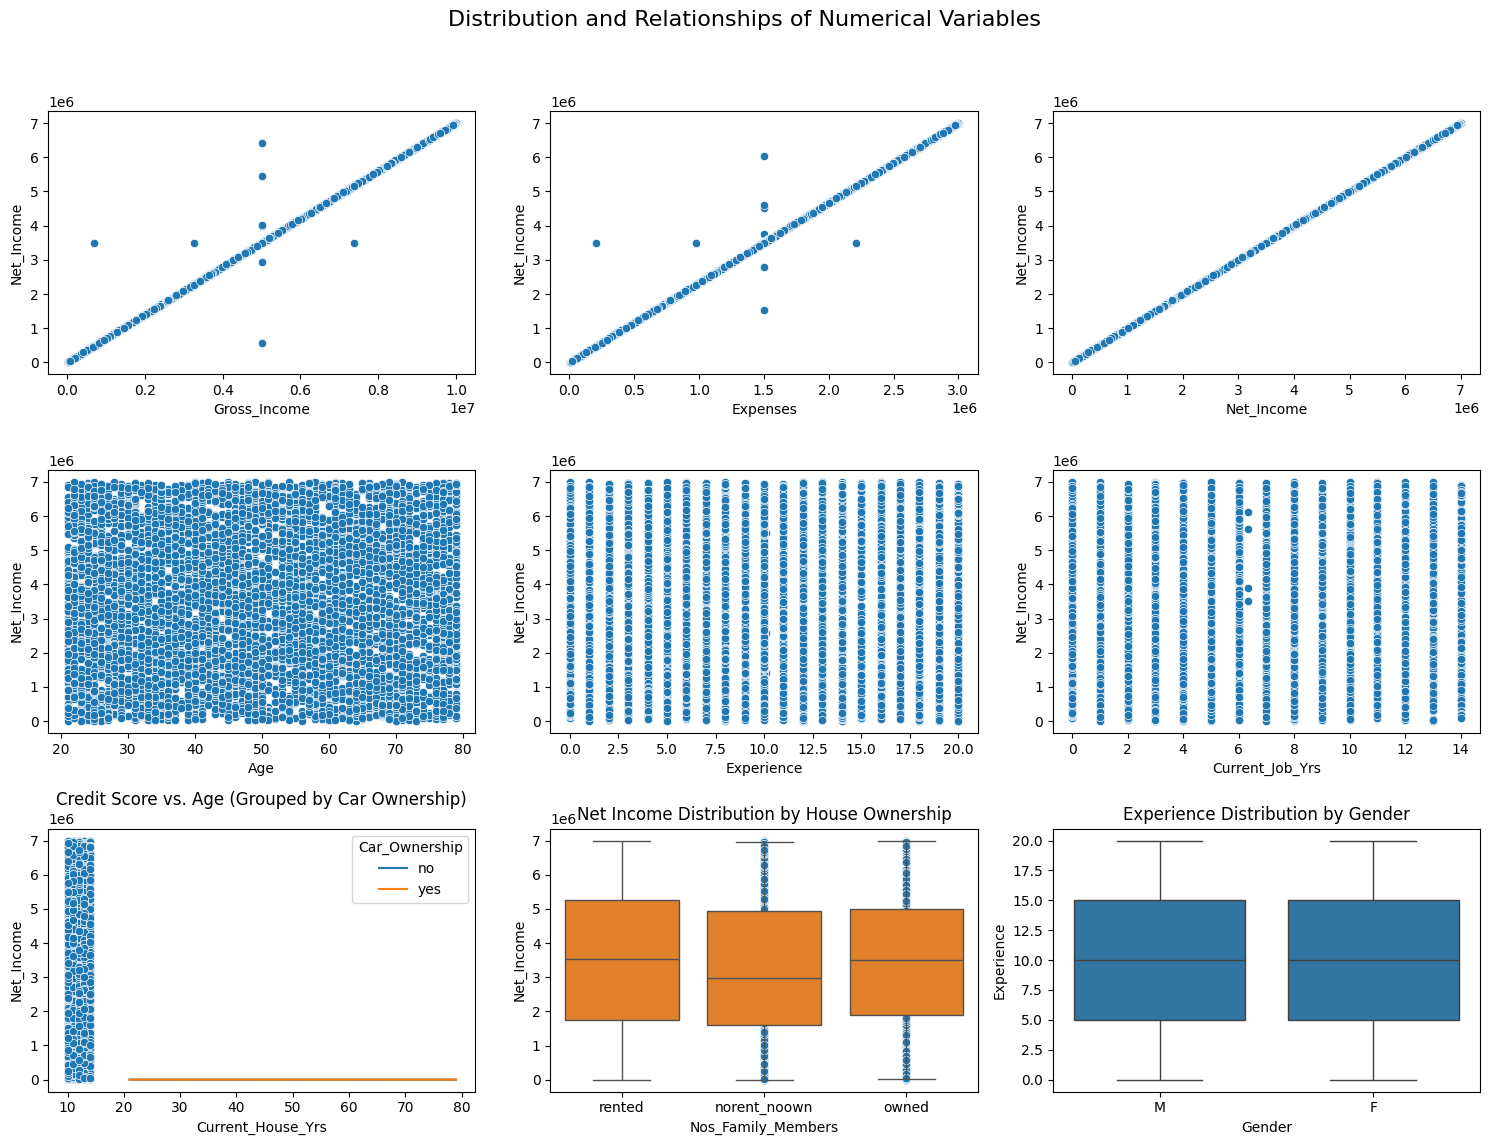

In [122]:

# numerical columns for visualization
numerical_columns = ['Gross_Income', 'Expenses', 'Net_Income', 'Age', 'Experience', 'Current_Job_Yrs', 'Current_House_Yrs', 'Nos_Family_Members', 'Credit_Score']

# subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution and Relationships of Numerical Variables', fontsize=16)

# Scatter plots for numerical variables against 'Net_Income'
for i, col in enumerate(numerical_columns[:-1]):
    sns.scatterplot(x=col, y='Net_Income', data=df, ax=axes[i // 3, i % 3])

# Line plot for 'Credit_Score' over 'Age' with grouping by 'Car_Ownership'
sns.lineplot(x='Age', y='Credit_Score', hue='Car_Ownership', data=df, ax=axes[2, 0])
axes[2, 0].set(title='Credit Score vs. Age (Grouped by Car Ownership)')

# Box plot for 'Net_Income' grouped by 'House_Ownership'
sns.boxplot(x='House_Ownership', y='Net_Income', data=df, ax=axes[2, 1])
axes[2, 1].set(title='Net Income Distribution by House Ownership')

# Box plot for 'Experience' grouped by 'Gender'
sns.boxplot(x='Gender', y='Experience', data=df, ax=axes[2, 2])
axes[2, 2].set(title='Experience Distribution by Gender')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


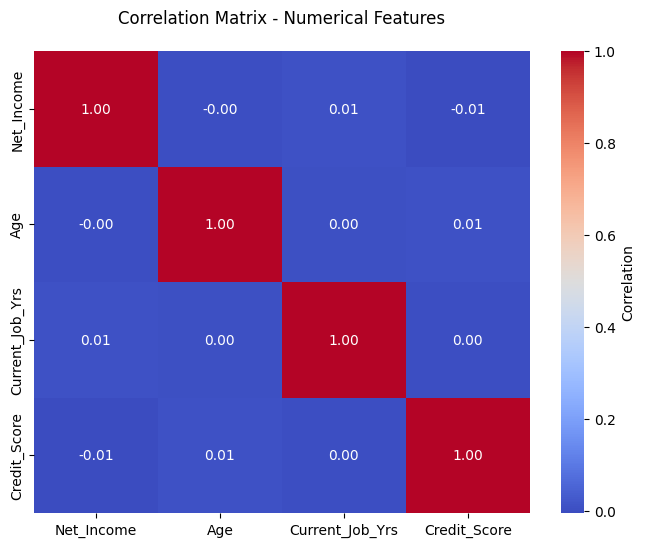

In [123]:
# Correlation Matrix
numerical_features = ['Net_Income', 'Age', 'Current_Job_Yrs', 'Credit_Score']
corr = df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Numerical Features', pad=20)  # pad adjusts title position
# plt.xticks(rotation=45)  
plt.show()


Text(0.5, 1.0, 'Age vs Profession')

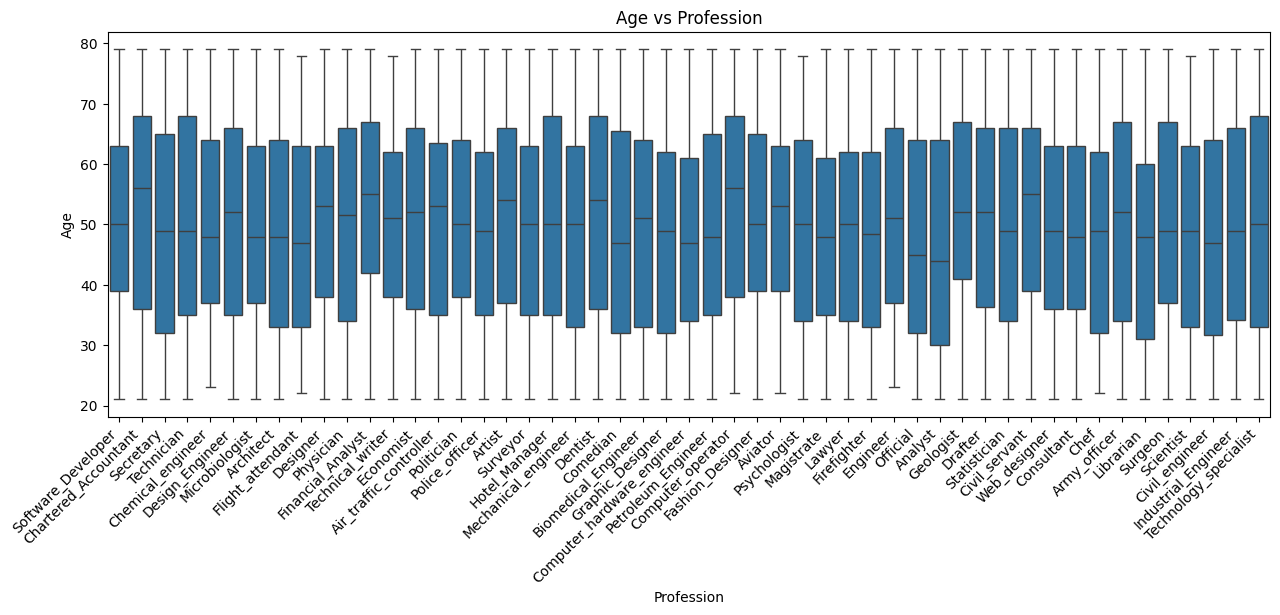

In [124]:

# Age vs Profession
plt.figure(figsize=(15, 5))
sns.boxplot(x='Profession', y='Age', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Age vs Profession')


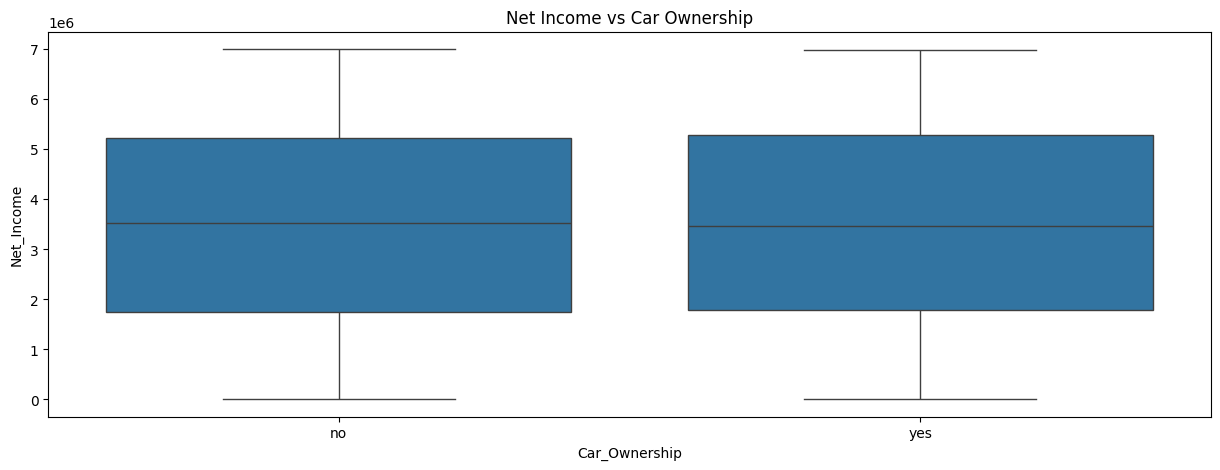

In [125]:
# Net Income vs Car Ownership
plt.figure(figsize=(15, 5))
sns.boxplot(x='Car_Ownership', y='Net_Income', data=df)
plt.title('Net Income vs Car Ownership')

plt.show()


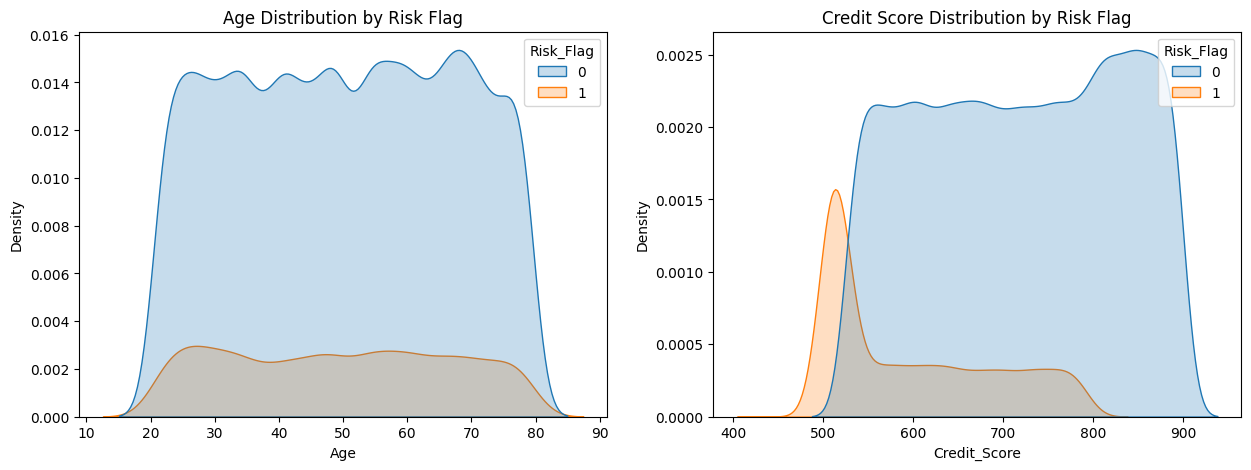

In [126]:

# KDE Plots
plt.figure(figsize=(15, 5))

# Age by Risk Flag
plt.subplot(1, 2, 1)
sns.kdeplot(x='Age', hue='Risk_Flag', data=df, fill=True)
plt.title('Age Distribution by Risk Flag')

# Credit Score by Risk Flag
plt.subplot(1, 2, 2)
sns.kdeplot(x='Credit_Score', hue='Risk_Flag', data=df, fill=True)
plt.title('Credit Score Distribution by Risk Flag')

plt.show()

<Figure size 800x600 with 0 Axes>

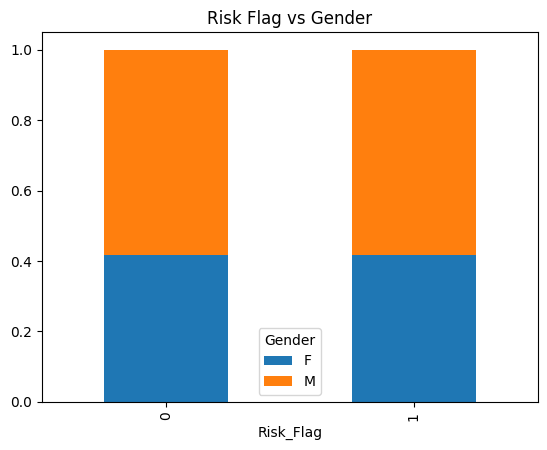

In [127]:
# Categorical vs Categorical - Stacked Bar Plot
plt.figure(figsize=(8, 6))

# Cross-tabulation and Percentage Stacked Bar Plot
cross_tab = pd.crosstab(df['Risk_Flag'], df['Gender'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.title('Risk Flag vs Gender')
plt.show()

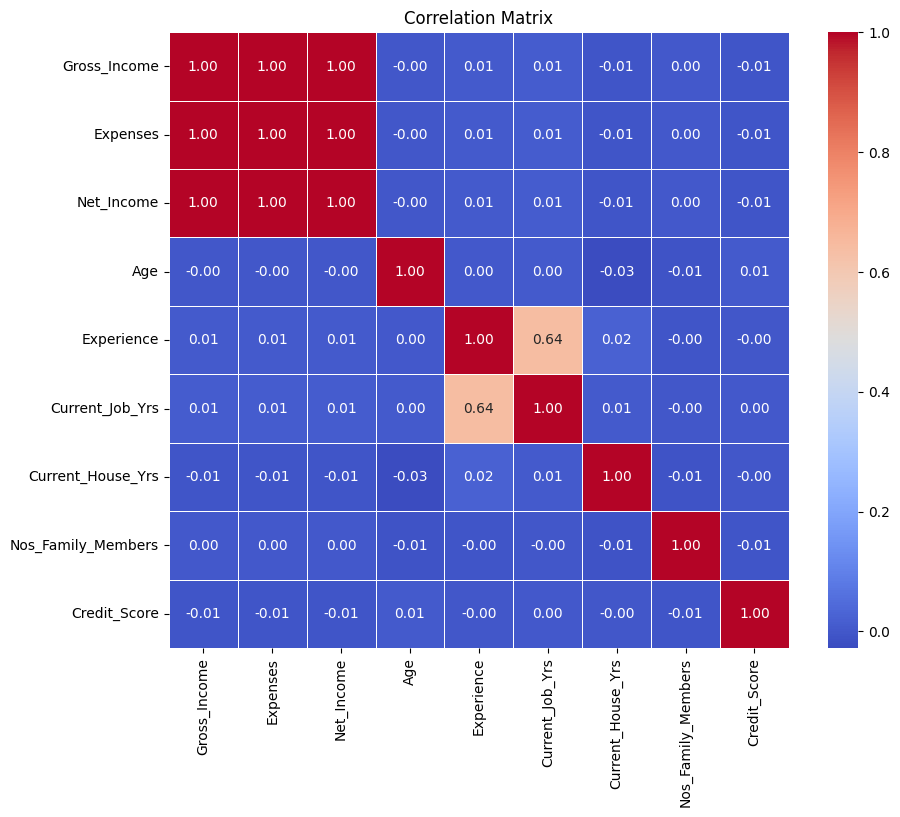

In [128]:


# Select numerical columns for correlation analysis
numerical_columns = ['Gross_Income', 'Expenses', 'Net_Income', 'Age', 'Experience', 'Current_Job_Yrs', 'Current_House_Yrs', 'Nos_Family_Members', 'Credit_Score']

# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



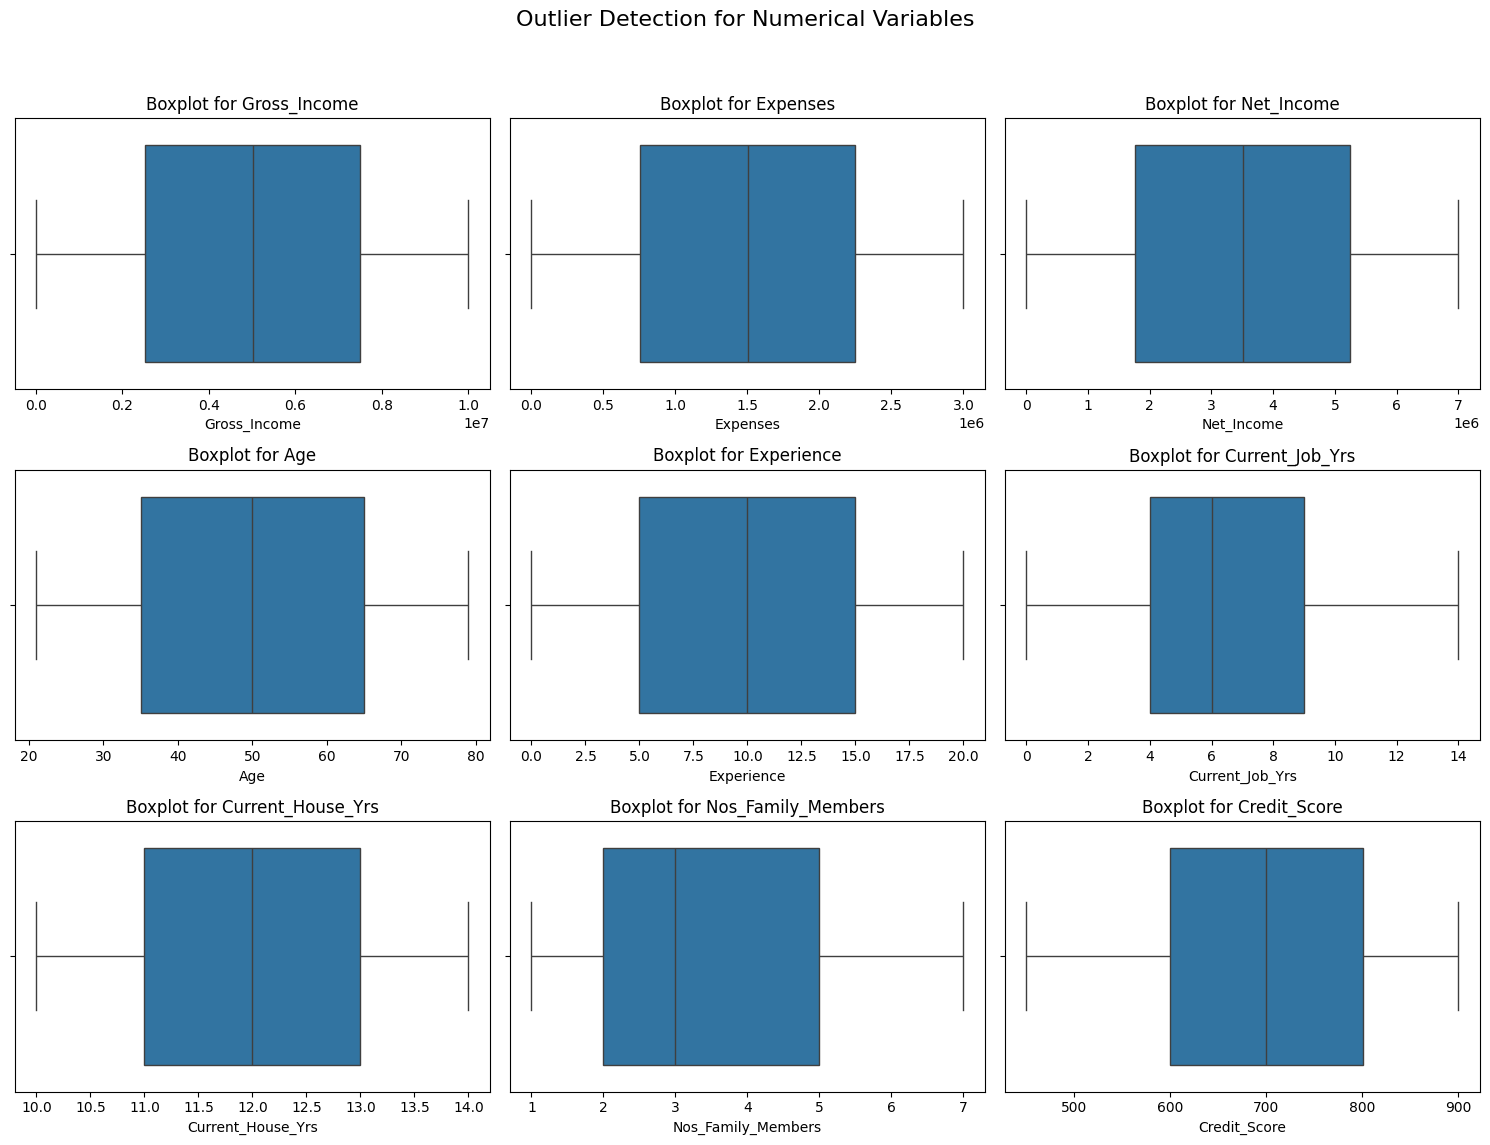

In [129]:

# Outlier detection using box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Outlier Detection for Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set(title=f'Boxplot for {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

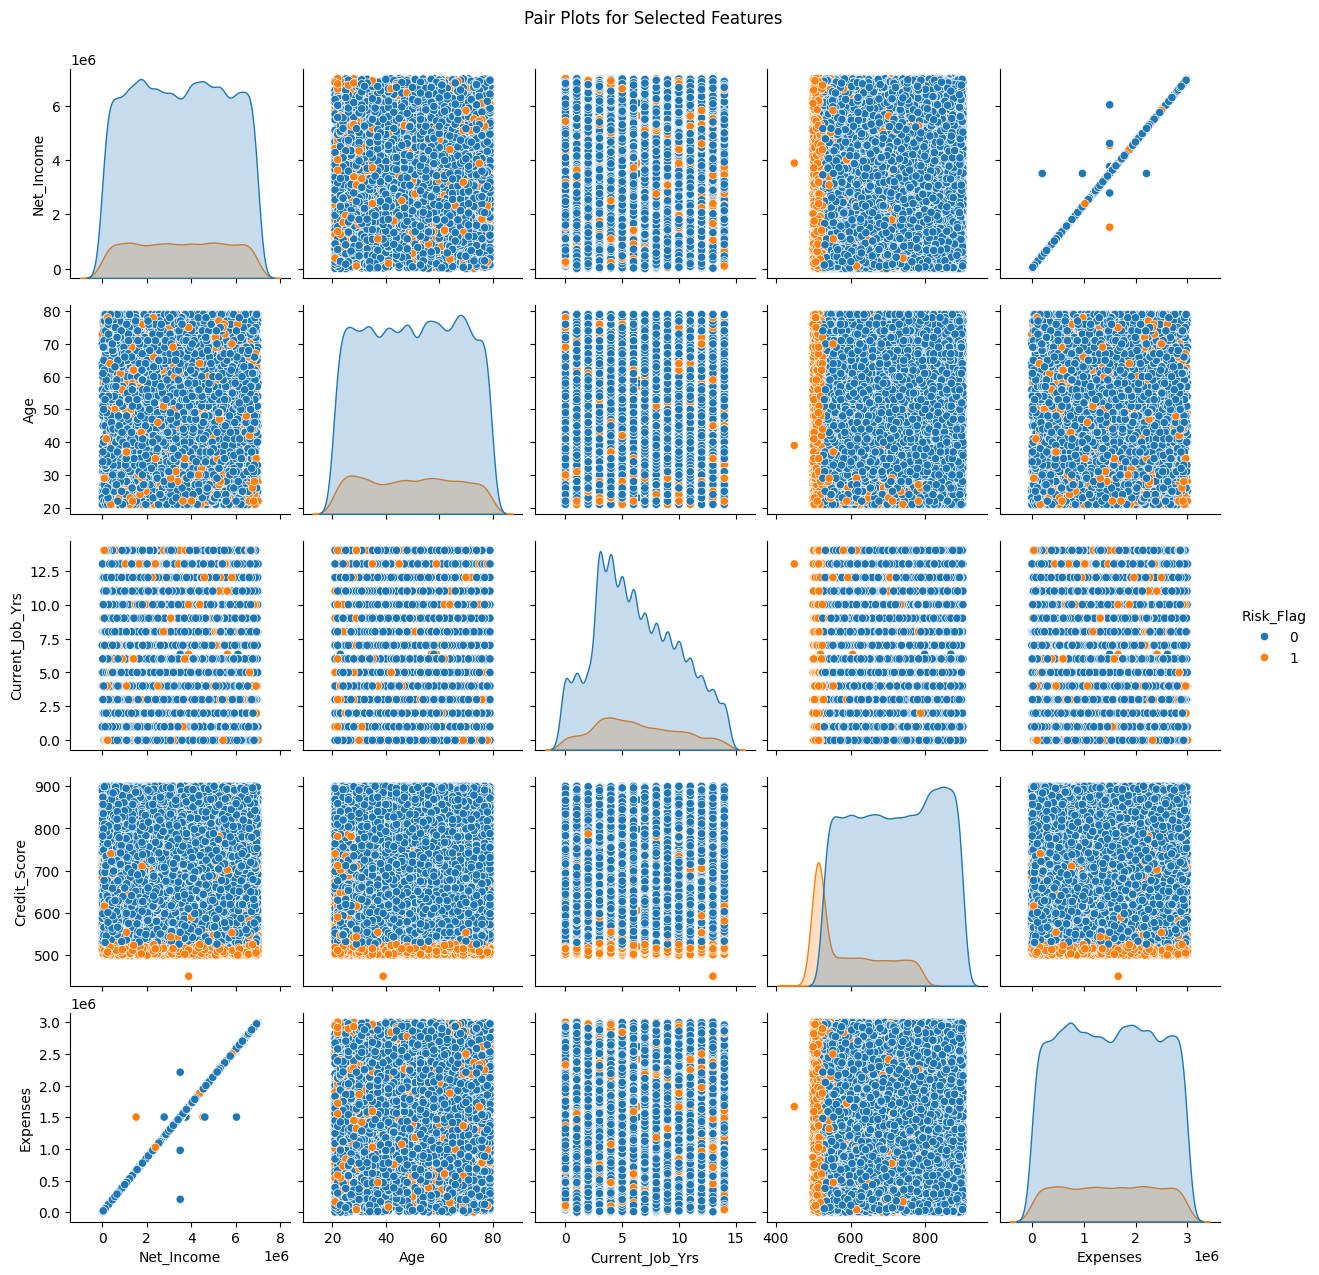

In [130]:
#  Pair Plots
selected_features = ['Net_Income', 'Age', 'Current_Job_Yrs', 'Credit_Score', 'Expenses', 'Credit_Type', 'Risk_Flag']
sns.pairplot(df[selected_features], hue='Risk_Flag')
plt.suptitle('Pair Plots for Selected Features', y=1.02)
plt.show()


In [131]:
df.head()

,Id,Gross_Income,Expenses,Net_Income,Age,Gender,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Yrs,Current_House_Yrs,Nos_Family_Members,Credit_Type,Credit_Score,Co-Applicant_Credit_Type,Risk_Flag
0,1.0,1303834.0,391173.0,912661.0,23.0,M,3.0,single,rented,no,Software_Developer,Hindupur,Andhra_Pradesh,3.0,13.0,1,EXP,758.0,CIB,0
1,2.0,7574516.0,2272395.0,5302121.0,40.0,F,10.0,single,rented,no,Chartered_Accountant,Khandwa,Madhya_Pradesh,9.0,13.0,3,EQUI,552.0,EXP,1
2,3.0,3991815.0,1197611.0,2794204.0,66.0,M,4.0,married,rented,no,Secretary,Bidhannagar,West_Bengal,4.0,10.0,4,EXP,834.0,CIB,0
3,4.0,6256451.0,1876976.0,4379475.0,41.0,F,2.0,married,rented,yes,Technician,Bellary,Karnataka,2.0,12.0,1,EXP,587.0,CIB,1
4,5.0,5768871.0,1730708.0,4038163.0,47.0,M,11.0,single,rented,no,Secretary,Danapur,Bihar,3.0,14.0,2,CRIF,602.0,EXP,1


#### Feraure engineering

In [132]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Profession', 'City', 'State', 'Credit_Type', 'Co-Applicant_Credit_Type'], prefix='', prefix_sep='')

# One-hot encoding for binary columns
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status', 'House_Ownership', 'Car_Ownership'], prefix='', prefix_sep='')

# Label encoding for other categorical columns
label_encoder = LabelEncoder()
df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'])


df.head()


,Id,Gross_Income,Expenses,Net_Income,Age,Experience,Current_Job_Yrs,Current_House_Yrs,Nos_Family_Members,Credit_Score,...,EXP,F,M,married,single,norent_noown,owned,rented,no,yes
0,1.0,1303834.0,391173.0,912661.0,23.0,3.0,3.0,13.0,1,260,...,False,False,True,False,True,False,False,True,True,False
1,2.0,7574516.0,2272395.0,5302121.0,40.0,10.0,9.0,13.0,3,53,...,True,True,False,False,True,False,False,True,True,False
2,3.0,3991815.0,1197611.0,2794204.0,66.0,4.0,4.0,10.0,4,336,...,False,False,True,True,False,False,False,True,True,False
3,4.0,6256451.0,1876976.0,4379475.0,41.0,2.0,2.0,12.0,1,88,...,False,True,False,True,False,False,False,True,False,True
4,5.0,5768871.0,1730708.0,4038163.0,47.0,11.0,3.0,14.0,2,103,...,True,False,True,False,True,False,False,True,True,False


In [133]:
# Identifying and renaming duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()].tolist()

for col in duplicate_columns:
    df.rename(columns={col: col + '_duplicate'}, inplace=True)

# removing duplicate feature names
df = df.loc[:,~df.columns.duplicated()]

# Replacing special characters in column names
df.columns = df.columns.astype(str).str.replace('[^a-zA-Z0-9]', '_', regex=True)

    
df.head()


,Id,Gross_Income,Expenses,Net_Income,Age,Experience,Current_Job_Yrs,Current_House_Yrs,Nos_Family_Members,Credit_Score,...,EXP_duplicate,F,M,married,single,norent_noown,owned,rented,no,yes
0,1.0,1303834.0,391173.0,912661.0,23.0,3.0,3.0,13.0,1,260,...,True,False,True,False,True,False,False,True,True,False
1,2.0,7574516.0,2272395.0,5302121.0,40.0,10.0,9.0,13.0,3,53,...,False,True,False,False,True,False,False,True,True,False
2,3.0,3991815.0,1197611.0,2794204.0,66.0,4.0,4.0,10.0,4,336,...,True,False,True,True,False,False,False,True,True,False
3,4.0,6256451.0,1876976.0,4379475.0,41.0,2.0,2.0,12.0,1,88,...,True,True,False,True,False,False,False,True,False,True
4,5.0,5768871.0,1730708.0,4038163.0,47.0,11.0,3.0,14.0,2,103,...,False,False,True,False,True,False,False,True,True,False


In [134]:
df.columns

Index(['Id', 'Gross_Income', 'Expenses', 'Net_Income', 'Age', 'Experience',
       'Current_Job_Yrs', 'Current_House_Yrs', 'Nos_Family_Members',
       'Credit_Score',
       ...
       'EXP_duplicate', 'F', 'M', 'married', 'single', 'norent_noown', 'owned',
       'rented', 'no', 'yes'],
      dtype='object', length=421)

### Model Training

In [135]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# splitting the data into features and target variable
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']


def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test)
    print('Accuracy:', accuracy)
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))
    
    return accuracy


In [136]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)  
accuracy_lr= classify(model_lr, X, y)

Accuracy: 0.8442093940480458
CV Score: 0.8511422459270822


In [137]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
accuracy_dt= classify(model_dt, X, y)

Accuracy: 0.8866977411258515
CV Score: 0.633955881617914


In [138]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
accuracy_rf= classify(model_rf, X, y)

Accuracy: 0.9342058085335245
CV Score: 0.6599515995717955


In [139]:
from sklearn.ensemble import ExtraTreesClassifier
model_et = ExtraTreesClassifier()
accuracy_et = classify(model_et, X, y)

Accuracy: 0.9160093223377554
CV Score: 0.9146259164075298


In [140]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
accuracy_xgb= classify(model_xgb, X, y)

Accuracy: 0.9142165650770886
CV Score: 0.784519789356245


In [141]:
from lightgbm import LGBMClassifier
model_lgbm = LGBMClassifier(verbose=-1)
accuracy_lgbm= classify(model_lgbm, X, y)

Accuracy: 0.9128719971315884
CV Score: 0.797195386755839


In [142]:
from catboost import CatBoostClassifier
model_catboost = CatBoostClassifier(verbose=0)
accuracy_catboost= classify(model_catboost, X, y)

Accuracy: 0.9256902115453568
CV Score: 0.8222599155708561


#### performance comparison

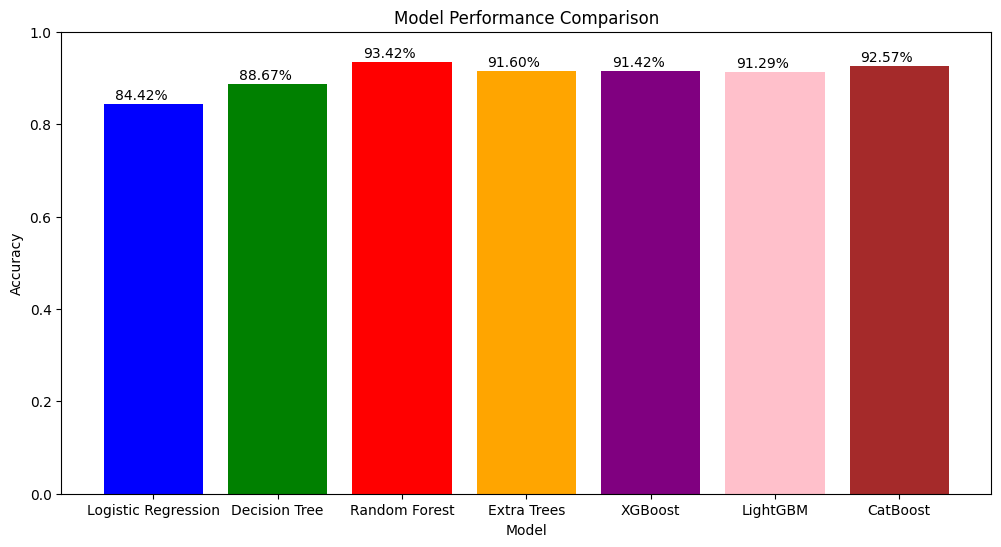

In [144]:
# Creating a bar plot for model performance comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'XGBoost', 'LightGBM', 'CatBoost']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_et, accuracy_xgb, accuracy_lgbm, accuracy_catboost]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Adding accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.2%}', ha='center', color='black')

plt.show()
